In [8]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.optim import Adam
import torch.nn as nn
from torch.utils.data import DataLoader

from binarypredictor.dataset import FunctionDataset
from binarypredictor.net import DerivativeNet

In [12]:
@torch.enable_grad()
def epoch(net, train_loader, loss_func, optimizer):
    epoch_losses = np.zeros([len(train_loader), ])

    for i, d in enumerate(train_loader):
        # Forward
        inp, targets = d[:, :, 0], d[:, :, 1]
        targets[targets > 1000] = 0
        out = net(inp.float())

        # Calculate the loss
        loss = loss_func(out, targets)
        epoch_losses[i] = loss
        
        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('Epoch loss: ', epoch_losses.mean())
    return epoch_losses.mean()

In [13]:
@torch.enable_grad()
def train(net, train_loader, test_loader):
    # Hyperparameters
    nr_epochs = 100
    lr = 1e-4
    
    # Workers
    loss_func = nn.MSELoss()
    optimizer = Adam(net.parameters(), lr=lr)
    
    # Losses
    losses = np.zeros([nr_epochs, ])
    
    # Baseline for best network
    best_loss = epoch(net, train_loader, loss_func, optimizer)
    best_net = net
    
    # Training
    for i in range(nr_epochs):
        losses[i] = epoch(net, train_loader, loss_func, optimizer)
        
        if losses[i] < best_loss:
            best_net = net
            best_loss = losses[i]
            
    return best_net, losses

In [2]:
fd_0 = FunctionDataset(100000, 'first.csv', o=0)
fd_1 = FunctionDataset(100000, 'second.csv', o=1)

In [4]:
loader_0 = DataLoader(fd_0, batch_size=256, shuffle=True)
loader_1 = DataLoader(fd_1, batch_size=256, shuffle=True)
net_0 = DerivativeNet(train=True, hidden_layers=3)
net_1 = DerivativeNet(train=True, hidden_layers=3)

In [ ]:
best_net_0, _ = train(net_0, loader_0, None)
print('First derivative net trained!')
best_net_1, _ = train(net_1, loader_1, None)
print('Second derivative net trained!')

In [15]:
#torch.save(net_0, 'FirstDerivativeNet_100.pth')
#torch.save(net_1, 'SecondDerivativeNet_100.pth')

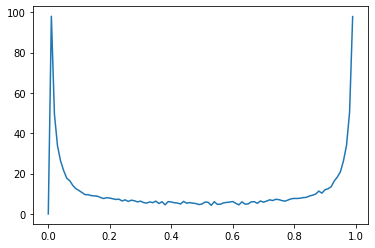

tensor([], dtype=torch.int64)


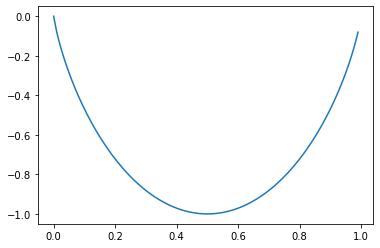

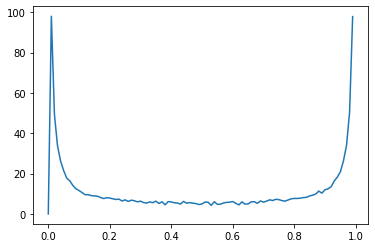

tensor([], dtype=torch.int64)


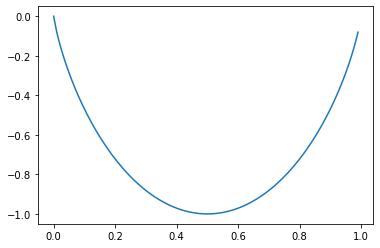

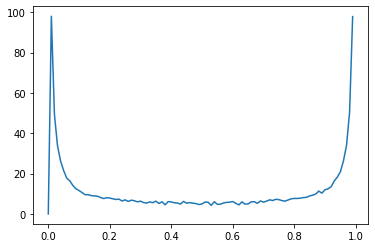

tensor([], dtype=torch.int64)


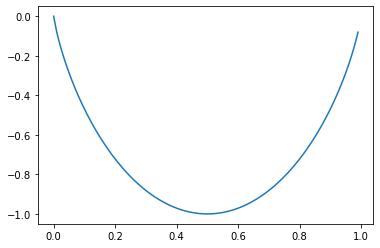

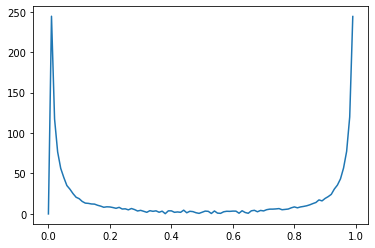

tensor([], dtype=torch.int64)


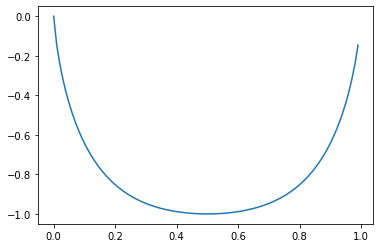

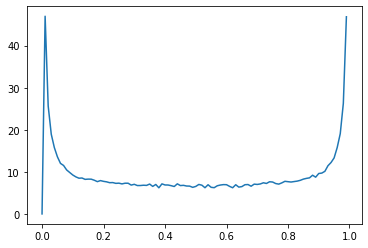

tensor([], dtype=torch.int64)


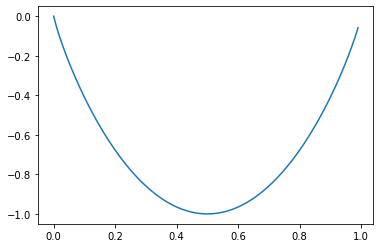

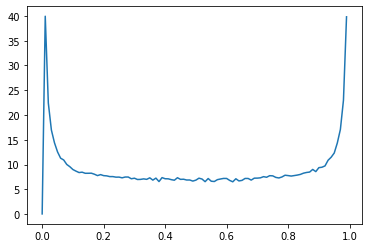

tensor([], dtype=torch.int64)


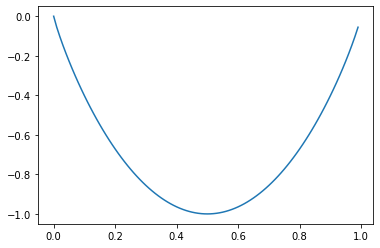

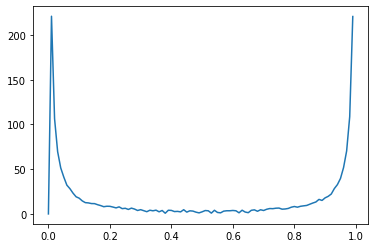

tensor([], dtype=torch.int64)


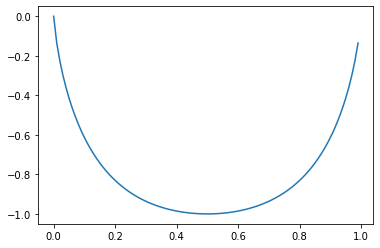

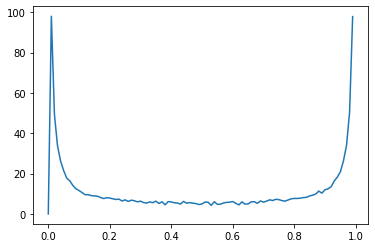

tensor([], dtype=torch.int64)


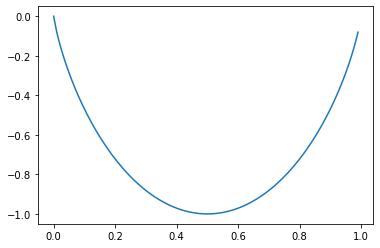

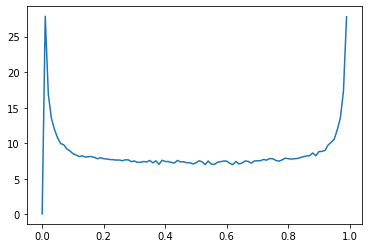

tensor([], dtype=torch.int64)


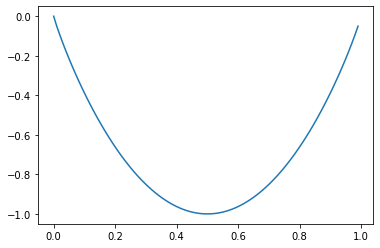

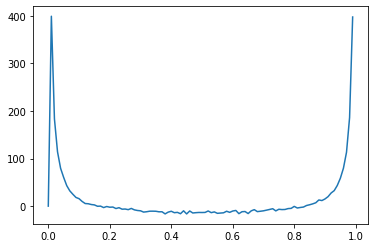

tensor([15, 83])


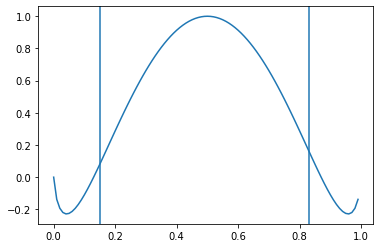

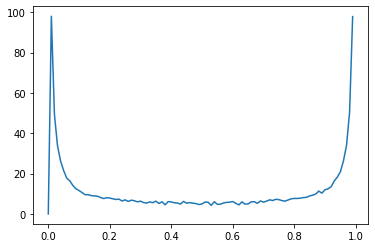

tensor([], dtype=torch.int64)


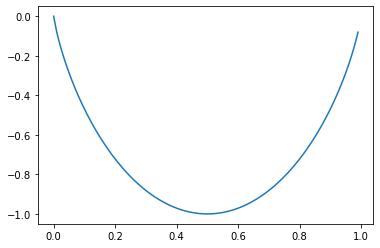

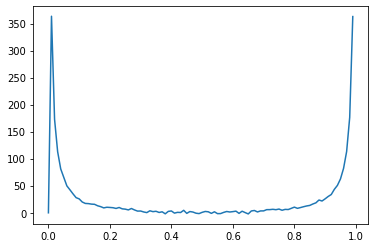

tensor([37, 65])


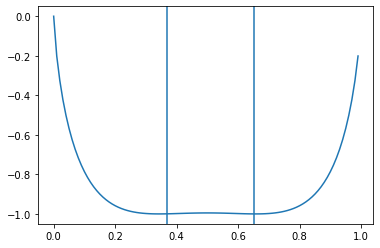

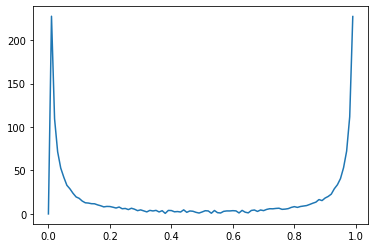

tensor([], dtype=torch.int64)


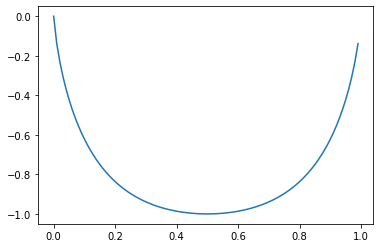

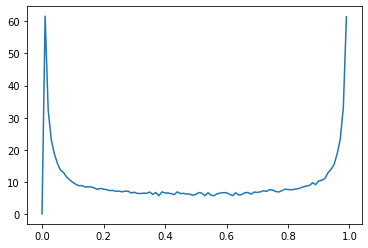

tensor([], dtype=torch.int64)


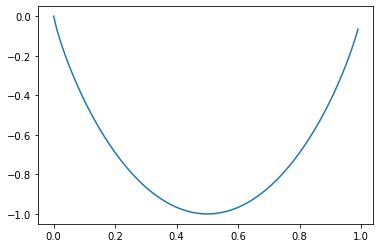

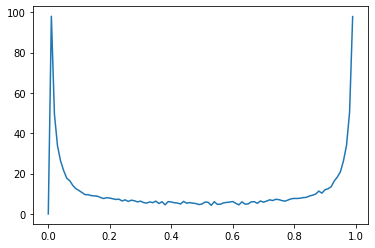

tensor([], dtype=torch.int64)


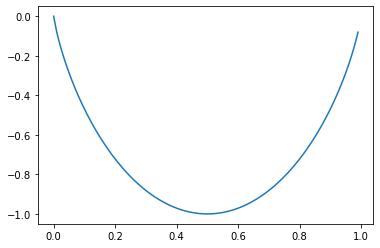

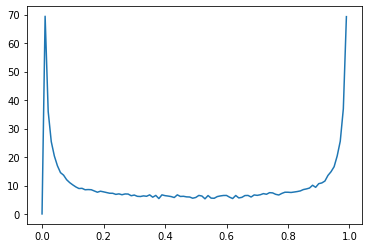

tensor([], dtype=torch.int64)


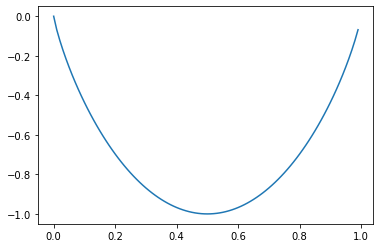

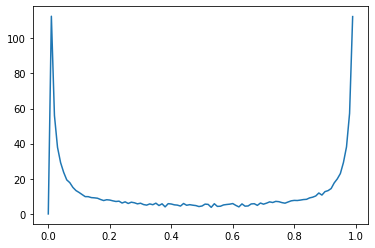

tensor([], dtype=torch.int64)


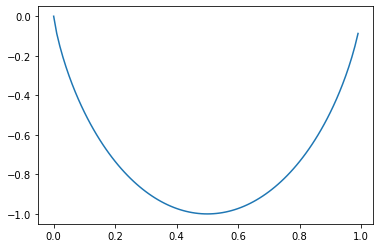

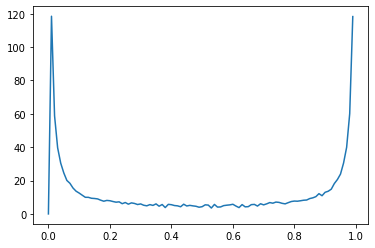

tensor([], dtype=torch.int64)


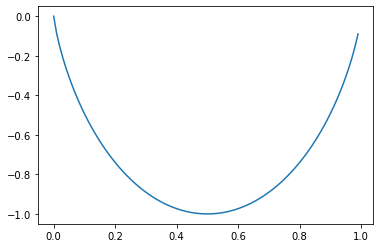

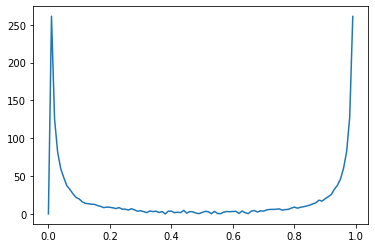

tensor([], dtype=torch.int64)


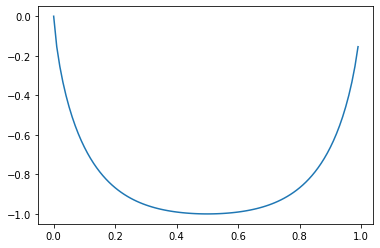

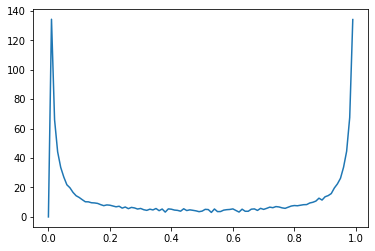

tensor([], dtype=torch.int64)


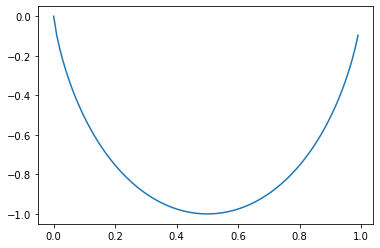

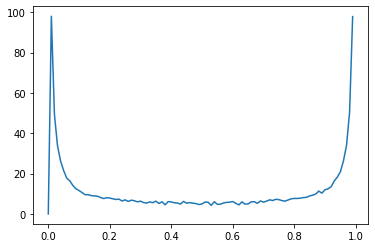

tensor([], dtype=torch.int64)


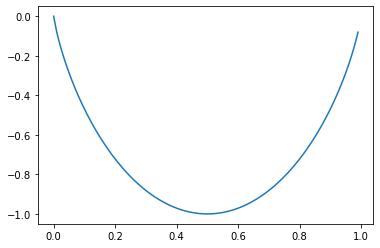

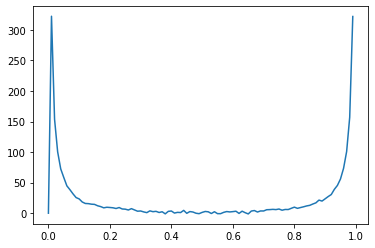

tensor([37, 65])


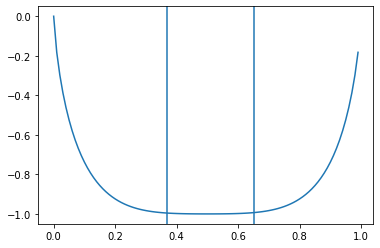

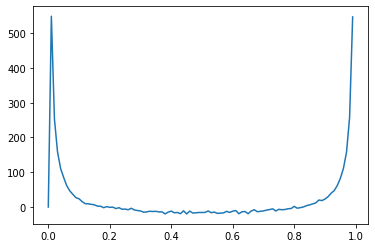

tensor([17, 83])


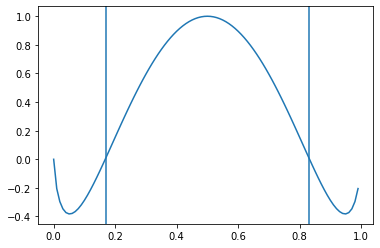

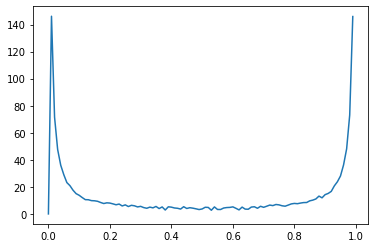

tensor([], dtype=torch.int64)


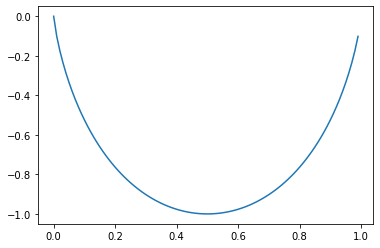

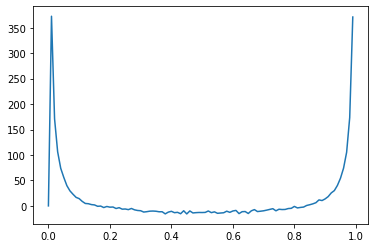

tensor([15, 83])


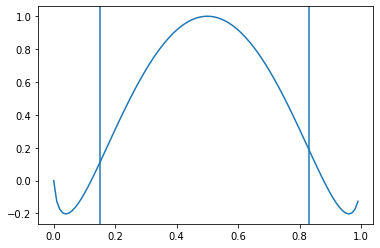

In [37]:
#net = torch.load('DerivativeNet_100.pth')
x = torch.arange(0., 1., step=.01)
fd_test = FunctionDataset(25, 'None.csv', o=0)

for d in fd_test:
    #plt.plot(x, d[:, 0])
    #plt.show()
    #plt.plot(x, d[:, 1])
    
    out = net_0(d[:, 0])
    #plt.plot(x, out.detach())
    #plt.show()
    
    second_der = net_1(out)
    plt.plot(x, second_der.detach())
    plt.show()
    
    idx = torch.where(torch.diff(torch.sign(second_der)) != 0)[0]
    idx = idx[idx != 0]
    if len(idx) > 0:
        valid_idx = [idx[i] for i in range(1, len(idx) - 1) if idx[i + 1] - idx[i] > 2 and abs(idx[i] - idx[i - 1]) > 2]
        if idx[-1] - idx[0] > 2:
            valid_idx += [idx[0]] + [idx[-1]]
        idx = torch.tensor(valid_idx, dtype=torch.int64)
        
    print(idx)
    x_idx = x[idx]
    
    plt.plot(x, d[:, 0])
    for i in x_idx:
        plt.axvline(i)
    plt.show()